C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


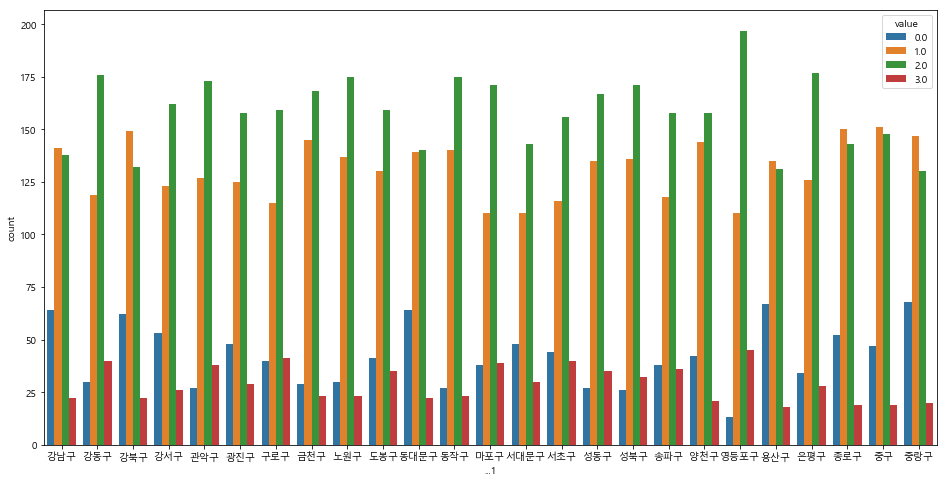

In [16]:
import glob
import pandas as pd
import seaborn as sns
file_list = glob.glob("../data/dust/*.csv")
file_list
all_data = pd.DataFrame()
for file_path in file_list:
    data = pd.read_csv(file_path, encoding='cp949',sep=",")
    all_data=pd.concat([all_data, data], axis=0)

all_data

all_data['...1']
all_data_1=all_data[all_data['...1']!="서울시 평균"]
all_data_2=all_data_1.loc[:,"...1":"X31"]
all_data_2=pd.melt(all_data_2,id_vars="...1")
all_data_3=all_data_2.loc[:,["...1","value"]]
all_data_4=all_data_3.dropna(axis=0)
all_data_4["count"]=1
all_data_5=all_data_4.groupby(["...1","value"]).count().reset_index()


import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import  font_manager,rc
plt.rcParams["axes.unicode_minus"]=False

#f_path="/Library/Fonts/AppleGothic.ttf"(맥)
f_path="C:/Windows/Fonts/malgun.ttf" #(윈도우)
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc("font",family=font_name)

import matplotlib.pyplot as plt
ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x='...1',y="count",hue="value",data=all_data_5)
plt.show()

In [17]:
all_data_2.head()

,...1,variable,value
0,종로구,X1,1.0
1,중구,X1,1.0
2,용산구,X1,2.0
3,성동구,X1,2.0
4,광진구,X1,2.0


In [18]:
all_data_3.head()

,...1,value
0,종로구,1.0
1,중구,1.0
2,용산구,2.0
3,성동구,2.0
4,광진구,2.0


In [19]:
all_data_4.head()

,...1,value,count
0,종로구,1.0,1
1,중구,1.0,1
2,용산구,2.0,1
3,성동구,2.0,1
4,광진구,2.0,1


In [20]:
all_data_5.head()

,...1,value,count
0,강남구,0.0,64
1,강남구,1.0,141
2,강남구,2.0,138
3,강남구,3.0,22
4,강동구,0.0,30
